**Summary:**

The data is related with direct marketing campaigns of a Portuguese banking institution, based on phone calls (Moro, Cortez, and Rita 2014).The goal of the campaigns were to get the clients to subscribe to a term deposit. There are 20 input variables and 1 binary output variable (y) that indicates whether the client subscribed to a term deposit with values ‘yes’, ‘no’. 

The input variables can be divided into four categories:

* bank client data
* data related to last contact of current campaign 
* social and economic context attributes 
* other attributes.

**Bank client data** contains variables containing information about the client. It includes variables indicating age, job, marital status, education, whether they have credit in default, whether they have a housing loan, whether they have a personal loan.

**Data related to the last contact of the current campaign** contain variables indicating the mode of communication, month of last communication, day of week when the last contact was made and the last call duration.

**Social and economic context attributes** contain variables with the quarterly employment variation rate, monthly consumer price index, monthly consumer confidence index, number of employees and the euribor 3 month rate.

**Other attributes** include number of previous contacts with the client during the current campaign, number of days since the last contact for the previous campaign, number of contacts performed before the current campaign for the client and the outcome of the previous marketing campaign.

# **Import Libraries**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# **Loading Dataset**

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')
df['y'] = df['y'].map({'yes': 1, 'no': 0})
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [3]:
print("Shape of the data:", df.shape)
print("Columns Names are:\n", df.columns)

Shape of the data: (41188, 21)
Columns Names are:
 Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [4]:
print("General Information about the Data")
df.info()

General Information about the Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 

In [5]:
print("Data Types for all the columns of the data:")
print(df.dtypes)

Data Types for all the columns of the data:
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object


In [6]:
def categoricalUniqueValues(fields, df):
  for field in fields:
    print(f"Unique Values for {field} is -:")
    print(df[f"{field}"].unique())
    print()

categoricalFields = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
categoricalUniqueValues(categoricalFields, df)

Unique Values for job is -:
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Unique Values for marital is -:
['married' 'single' 'divorced' 'unknown']

Unique Values for education is -:
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Unique Values for default is -:
['no' 'unknown' 'yes']

Unique Values for housing is -:
['no' 'yes' 'unknown']

Unique Values for loan is -:
['no' 'yes' 'unknown']

Unique Values for contact is -:
['telephone' 'cellular']

Unique Values for month is -:
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Unique Values for day_of_week is -:
['mon' 'tue' 'wed' 'thu' 'fri']

Unique Values for poutcome is -:
['nonexistent' 'failure' 'success']



# **Exploratory Data Analysis**
Will perform some Exploratory Data Analysis to see how different features are distribute in the dataset.

1.1 Visualizing how age is distributed in the dataset

Text(0.5, 1.0, 'Age Count Distribution')

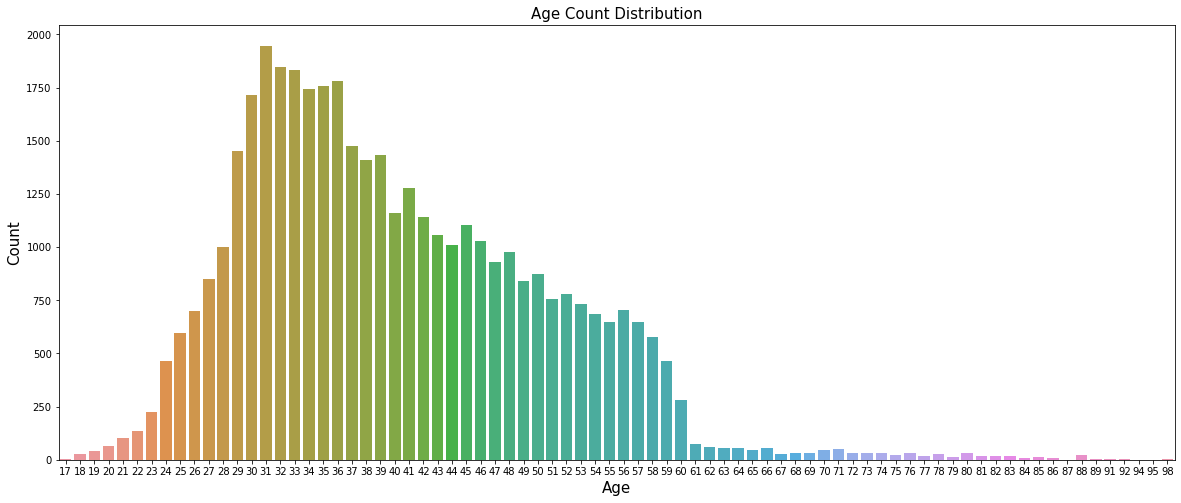

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = df)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)

1.2 Visualizing how Education is distributed in the dataset.

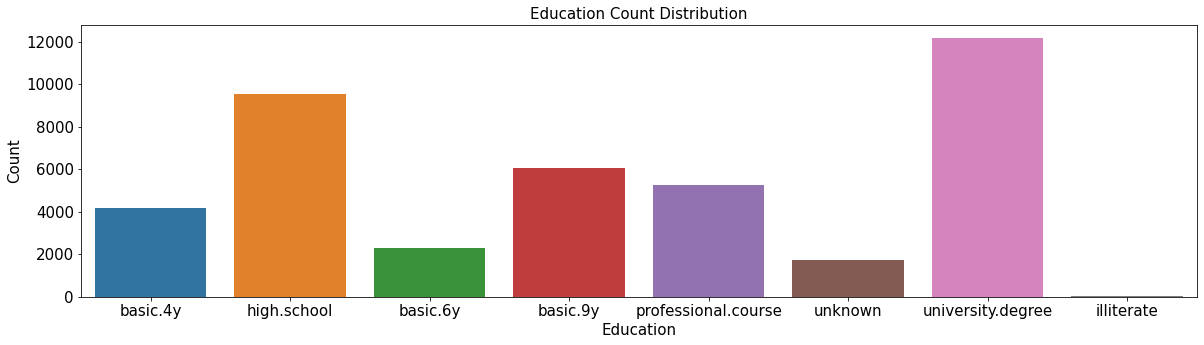

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = df)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)

1.3 Visualizing how Maritial Status is distributed in the dataset.

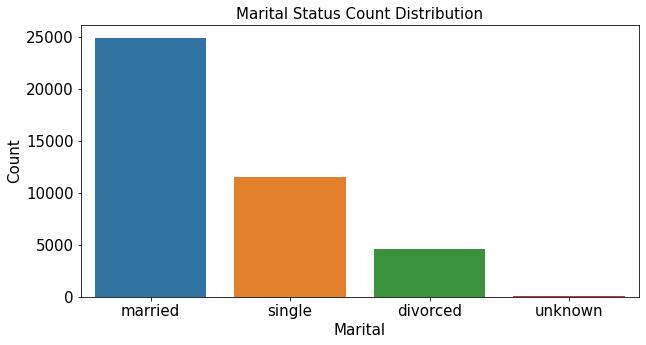

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = df)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital Status Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)

1.4 Visualizing how Jobs is distributed in the dataset.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

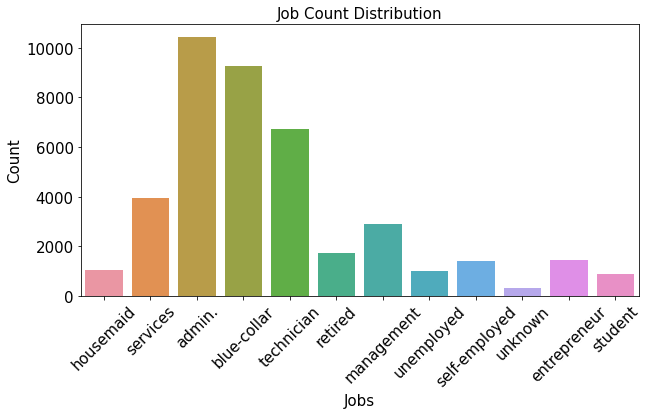

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'job', data = df)
ax.set_xlabel('Jobs', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
plt.xticks(rotation=45)

1.5 Visulization Related to Defaults, Housing Loans, Personal Loans

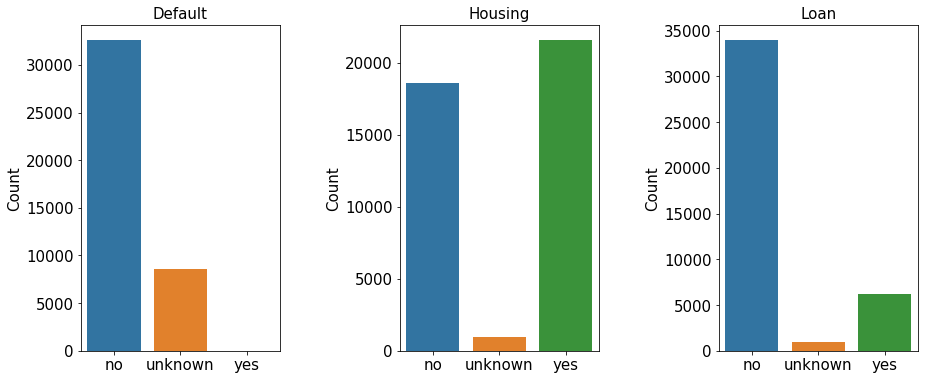

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(x = 'default', data = df, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

sns.countplot(x = 'housing', data = df, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

sns.countplot(x = 'loan', data = df, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.6)

1.6 Visualisation related to "Last Contact of the Current Campaign"

Text(0.5, 1.0, 'Call Duration vs Count')

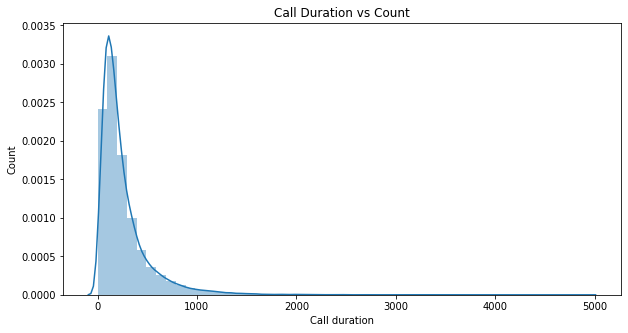

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

sns.distplot(df['duration'])
ax.set_xlabel("Call duration")
ax.set_ylabel("Count")
ax.set_title("Call Duration vs Count")

In [13]:
min_duration = df['duration'].min()
max_duration = df['duration'].max()
median_duration = df['duration'].mean()
standard_dev_duration = df["duration"].std()

print("Min call duration: ", min_duration)
print("Max call duration: ", max_duration)
print("Median call duration: ", round(median_duration, 2))
print("Standard diveation in call duration: ", round(standard_dev_duration, 2))

Min call duration:  0
Max call duration:  4918
Median call duration:  258.29
Standard diveation in call duration:  259.28


Text(0.5, 1.0, 'Count of Calls made on Days of the week')

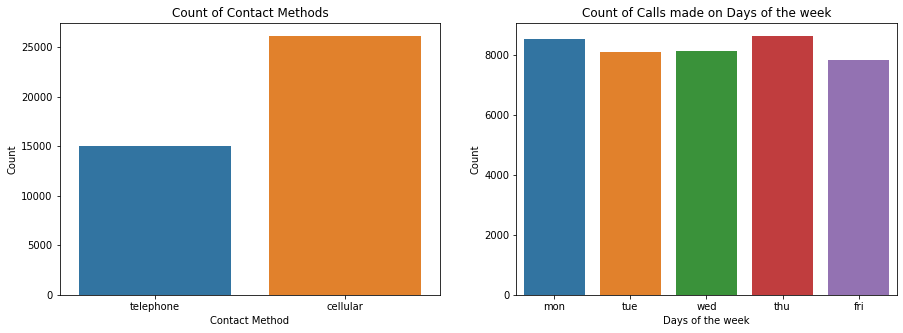

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

sns.countplot(x = 'contact', data = df, ax = ax1)
ax1.set_xlabel("Contact Method")
ax1.set_ylabel("Count")
ax1.set_title("Count of Contact Methods")

sns.countplot(df['day_of_week'], ax = ax2)
ax2.set_xlabel("Days of the week")
ax2.set_ylabel("Count")
ax2.set_title("Count of Calls made on Days of the week")

# **Looking for Correlations**

Checking for Correlated Columns

In [15]:
correlation_df = df.corr()
correlation_df_greater_than_75 = correlation_df[correlation_df >= 0.75]
correlation_df_greater_than_75

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pdays,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
emp.var.rate,NaN,NaN,NaN,NaN,NaN,1.000000,0.775334,NaN,0.972245,0.906970,NaN
cons.price.idx,NaN,NaN,NaN,NaN,NaN,0.775334,1.000000,NaN,NaN,NaN,NaN
cons.conf.idx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
euribor3m,NaN,NaN,NaN,NaN,NaN,0.972245,NaN,NaN,1.000000,0.945154,NaN
nr.employed,NaN,NaN,NaN,NaN,NaN,0.906970,NaN,NaN,0.945154,1.000000,NaN


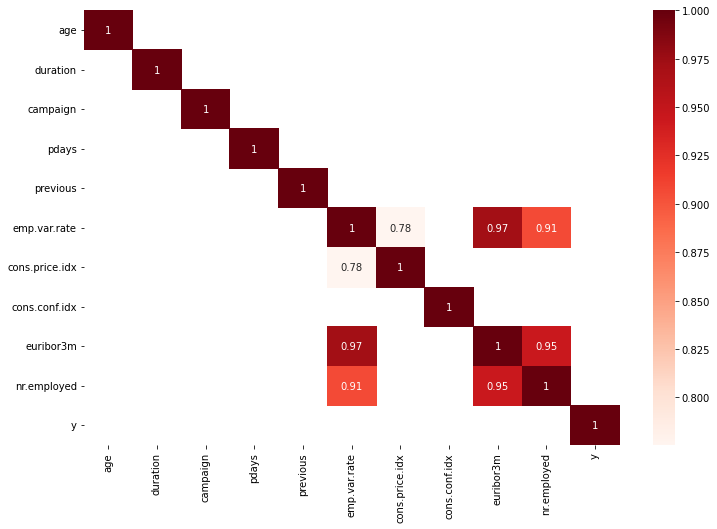

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_df_greater_than_75, cmap="Reds", annot = True)

Note -:
* emp.var.rate has a high correlation with nr.employed, euribor3m and cons.price.idx.
* euribor3m has a high correlation with nr.employed

we might need to consider this while selecting our features.

# **Data Cleaning**

Building custom transformers and pipeline

In [17]:
class FeatureSelector( BaseEstimator, TransformerMixin ):
    def __init__( self, feature_names ):
        self._feature_names = feature_names 
     
    def fit( self, X, y = None ):
        return self 

    def transform( self, X, y = None ):
        return X[ self._feature_names ]

class CategoricalTransformer( BaseEstimator, TransformerMixin ):
    def __init__(self ):
        pass
        
    def fit( self, X, y = None  ):
        return self
    
    def transform(self, X , y = None ):
      #Assuming unknown data
      X.loc[X['job'] == "unknown" ,'job'] = "unemployed"
      X.loc[X['marital'] == "unknown" ,'marital'] = "single"
      X.loc[X['education'] == "unknown" ,'education'] = "illiterate"
      
      #returns numpy array
      return X.values

In [18]:
#Categrical features
#We will be dropping contact, month and day of the week from categorical data
cateforical_features = ["job", "marital", "education", "default", "housing", "loan", "poutcome"]

#Numerical features 
#We will be dropping emp.var.rate, euribor3m
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.price.idx', 'cons.conf.idx', 'nr.employed']

#Defining the steps in the categorical pipeline 
categorical_pipeline = Pipeline( steps = [ 
                                          ( 'cat_selector', FeatureSelector(cateforical_features)),
                                          ('categorical_transfrom', CategoricalTransformer()),
                                          ( 'one_hot_encoder', OneHotEncoder( sparse = False ) ) 
                               ])
    
#Defining the steps in the numerical pipeline     
numerical_pipeline = Pipeline( steps = [ 
                                        ( 'num_selector', FeatureSelector(numerical_features) ),
                                        ('imputer', SimpleImputer(strategy = 'median') ),
                                        ( 'std_scaler', StandardScaler() ) 
                            ])

full_pipeline = FeatureUnion( transformer_list = [ 
                                                  ( 'categorical_pipeline', categorical_pipeline ), 
                                                  ( 'numerical_pipeline', numerical_pipeline ) 
                                              ])

# **Model Building**

Train and Test Split

In [19]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [20]:
train_set_x = train_set.drop("y", axis=1)
train_set_y = train_set["y"]

train_set_x_prep = full_pipeline.fit_transform(train_set_x)
train_set_y_prep = np.array(train_set_y)

Balancing the data using SMOTE

In [21]:
smote = SMOTE()

train_set_x_smote_prep, train_set_y_smote_prep = smote.fit_resample(train_set_x_prep, train_set_y_prep)

In [22]:
print('Original dataset shape', len(train_set_x_prep))
print('Resampled dataset shape', len(train_set_x_smote_prep))

Original dataset shape 32950
Resampled dataset shape 58490


In [23]:
testSet_x = test_set.drop(["y"], axis=1)
testSet_x_prep = full_pipeline.transform(testSet_x)

testSet_y_labels = np.array(test_set["y"])

In [34]:
def report(testSet_y_labels, testSet_y_pred):
  accuracy_test = accuracy_score(testSet_y_labels,testSet_y_pred)
  roc_test = roc_auc_score(testSet_y_labels, testSet_y_pred, multi_class='ovr')
  f1 = f1_score(testSet_y_labels, testSet_y_pred)
  precision = precision_score(testSet_y_labels, testSet_y_pred)
  recall = recall_score(testSet_y_labels, testSet_y_pred) 

  print('Accuracy is:', accuracy_test)
  print('ROC is:', roc_test)
  print("F score is:", f1)
  print("Precision is:",precision)
  print("Recall is:", recall)

## KNN Classifier

In [24]:
knn_cls = KNeighborsClassifier(n_neighbors = 20)
knn_cls.fit(train_set_x_smote_prep, train_set_y_smote_prep)

KNeighborsClassifier(n_neighbors=20)

In [25]:
testSet_y_pred = knn_cls.predict(testSet_x_prep)

In [26]:
report(testSet_y_labels, testSet_y_pred)

Accuracy is: 0.8319980577810148
ROC is: 0.8572161026784831
F score is: 0.5459317585301837
Precision is: 0.39375295787979175
Recall is: 0.8898395721925134


### Hypertuning KNN

In [27]:
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1)
grid_search = grid.fit(train_set_x_smote_prep, train_set_y_smote_prep)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [35]:
optimal_model = grid_search.best_estimator_

print("Best parameters are: ", grid_search.best_params_)
print("Best estimator is: ", grid_search.best_estimator_)
print('Scores and accuracies are:')
print()

testSet_y_pred = optimal_model.predict(testSet_x_prep)
report(testSet_y_labels, testSet_y_pred)

Best parameters are:  {'n_neighbors': 1}
Best estimator is:  KNeighborsClassifier(n_neighbors=1)
Scores and accuracies are:

Accuracy is: 0.8742413207089099
ROC is: 0.7425525075403047
F score is: 0.5080721747388414
Precision is: 0.4568744662681469
Recall is: 0.5721925133689839


## Decision Tree

In [36]:
dtree_cls = DecisionTreeClassifier(random_state=0)
dtree_cls.fit(train_set_x_smote_prep, train_set_y_smote_prep)

DecisionTreeClassifier(random_state=0)

In [37]:
testSet_y_pred = dtree_cls.predict(testSet_x_prep)

In [38]:
report(testSet_y_labels, testSet_y_pred)

Accuracy is: 0.8787327021121631
ROC is: 0.7436868300405444
F score is: 0.5157537566650509
Precision is: 0.4716312056737589
Recall is: 0.5689839572192513


### Hypertuning Decision Tree

In [ ]:
dtree = DecisionTreeClassifier()

param_grid = {'max_depth':np.arange(3,20),
              'min_samples_split': np.arange(3,20,1),
             'min_samples_leaf':np.arange(3,30),
              'min_samples_split' : np.arange(3,30),
              'criterion': ('gini', 'entropy')}

grid = GridSearchCV(dtree, param_grid, cv=3, scoring='accuracy', return_train_score=False, verbose=1)
grid_search = grid.fit(train_set_x_smote_prep, train_set_y_smote_prep)

In [ ]:
optimal_model = grid_search.best_estimator_

print("Best parameters are: ", grid_search.best_params_)
print("Best estimator is: ", grid_search.best_estimator_)
print('Scores and accuracies are:')
print()

testSet_y_pred = optimal_model.predict(testSet_x_prep)
report(testSet_y_labels, testSet_y_pred)